In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets

When prior probabilities are the same for all classes, the optimum decision rule can be stated very
simply: to classify a new sample by finding the class that has a prototype with the minimum
Euclidean distance to the new sample. Such a classifier is called a Minimum Distance Classifier.
Although a basic algorithm, MDC is a very fast classification method which in some cases works
pretty well.<br>
In this problem, you are to practice MDC in two different problems. First, assume the following toy
dataset:<br>
$$ \omega_1 = [[-1, 0.8],[-1, 0.9], [-1, 1.3]] , \omega_2 = [[-1, -0.5],[-1.2, -1.5], [-0.8, -1]] , \omega_3 = [[1.3, 0.5],[0.9, -0.2], [0.8, -0.3]] ,  $$
> a ) What are the prototype vectors for a minimum distance classifier?

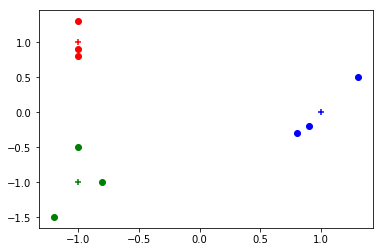

prototype for class 1:  [-1.  1.]
prototype for class 2:  [-1. -1.]
prototype for class 3:  [1. 0.]


In [6]:
colors = ["r", "g", "b"]
data = []
data.append(np.array([[-1, 0.8],[-1, 0.9], [-1, 1.3]]))
data.append(np.array([[-1, -0.5],[-1.2, -1.5], [-0.8, -1]]))
data.append(np.array([[1.3, 0.5],[0.9, -0.2], [0.8, -0.3]]))                  
prototypes =  []
for d in data:
    prototypes.append(np.average(d, axis=0))
for i in range(0, len (data)):
    plt.scatter(data[i][:,0],data[i][:,1], c = colors[i])
    plt.scatter(prototypes[i][0], prototypes[i][1],marker = '+',  c=colors[i])
plt.show()
for i in range(0, len (data)):
    s = "prototype for class "+str(i+1)+": "
    print (s, prototypes[i])

> b. Determine the label of the test vector $[-0.5, 1]^T$

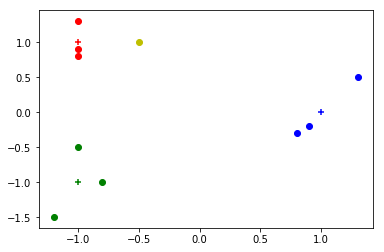

[-1.  1.]
distance-squared from class 1 : 0.25
[-1. -1.]
distance-squared from class 2 : 4.25
[1. 0.]
distance-squared from class 3 : 3.25


In [7]:
point = np.array([-0.5, 1])
for i in range(0, len (data)):
    plt.scatter(data[i][:,0],data[i][:,1], c = colors[i])
    plt.scatter(prototypes[i][0], prototypes[i][1],marker = '+',  c=colors[i])
plt.scatter([-0.5], [1], c='y')
plt.show()


import sys
for i in range (0, len(prototypes)):
    print (prototypes[i])
    diff = point - prototypes[i]
    print ("distance-squared from class", i+1, ":", np.dot(diff, diff))
    


As you can see, the closest prototype to the test point (yellow) is red prototype (first class). 

> c) Repeat the previous part assuming the new decision function: $d_j(x)=x^Tm_j - \frac{1}{2} m_j^T m_j$


In [9]:
point =  np.array([-0.5, 1])[np.newaxis]
for i in range (0, len(prototypes)):
    x = point.T
    m = prototypes[i][np.newaxis].T
    diff = np.matmul(x.T, m) - 0.5*np.matmul(m.T, m)
    print ("distance-function for class", i+1, ":", diff[0][0])

distance-function for class 1 : 0.5
distance-function for class 2 : -1.5
distance-function for class 3 : -1.0


The point is classified as first class.

> d) Write down the equation of the decision boundary separating classes 1 and 2 for a MDC
classifier.

Suppose that $a$ and $b$ are prototype points corresponded to class 1 and class 2. Then the boundary equation would be: 
$$ \frac{b-a}{||a-b||^2}.(x-a) - \frac{1}{2} \leq 0$$
So after doing some simple cacluation we will have the equation below:
$$ y = 0 $$

> e) Repeat the previous part for classes 1 and 3.

$$ -4x+2y - 11 \leq 0 $$

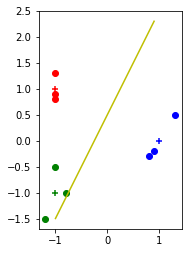

In [10]:
x = np.arange(-1, 1, 0.1)
y = np.zeros(len(x))
for i in range(0, len(x)):
    y[i] = (4*x[i] + 1)/2
for i in range(0, len (data)):
    plt.scatter(data[i][:,0],data[i][:,1], c = colors[i])
    plt.scatter(prototypes[i][0], prototypes[i][1],marker = '+',  c=colors[i])
plt.plot(x, y, c='y')
plt.gca().set_aspect('equal')
plt.show()
    

Now let’s consider a more realworld
problem. Load the iris
dataset, and consider only first and
third features (sepal length and
petal length).
> f) Classify the following points
using MDC. <br>
data = [[59,48],[50,25], [65,50], [55,30], [67,25]]

1
0
2
1
1


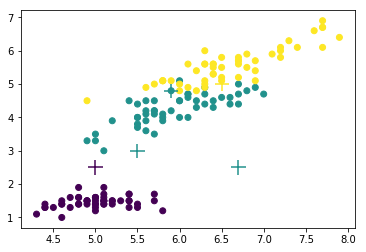

In [70]:
data_points = np.array([[5.9,4.8],[5.0,2.5], [6.5,5.0], [5.5,3.0], [6.7,2.5]])
iris = datasets.load_iris()
X = np.asarray(iris.data)[:,[0,2]]
y = iris.target
data=[[],[],[]]
for i in range(0, len (X)):
    data[y[i]].append(X[i])
prototypes = []
for i in range(0, len (data)):
    d = np.asarray(data[i])
    prototypes.append(np.average(d, axis=0))
cors = []
for i in range(0, len (data_points)):
    arg = []
    for j in range(0, len (data)):
        d = data_points[i]-np.asarray(prototypes[j])
        d = np.dot(d,d)
        arg.append(d)
    # print (arg)
    arg = np.argmin(np.asarray(arg))
    print (arg)
    cors.append(arg)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(data_points[:,0], data_points[:,1],c= cors, marker = '+', s=200)
plt.show()

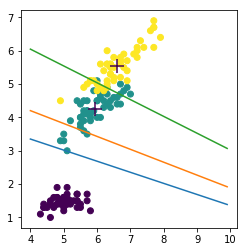

In [80]:
Xs =[]
Ys=[]
for i in range(0, 3):
    for j in range (i+1, 3):     
        a1 = prototypes[i][0]
        a2 = prototypes[i][1]
        b1 = prototypes[j][0]
        b2 = prototypes[j][1]
        x = np.arange(4, 10, 0.1)
        f = np.zeros(len(x))
        tmp = prototypes[i]-prototypes[j]
        tmp = np.dot(tmp, tmp)
        # print (tmp)
        for z in range(0, len (x)):
            f[z] = (1/(b2-a2))*((tmp/2)-(b1-a1)*(x[z]-a1))+a2
        Xs.append(x)
        Ys.append(f)
# 
plt.scatter(X[:, 0], X[:, 1], c=y)
tmp = [0,1,2]
for i in tmp:
    plt.scatter(prototypes[i][0], prototypes[i][1], marker = '+', c=tmp[i], s=200)
for v in tmp:
    plt.plot(Xs[v], Ys[v])
plt.gca().set_aspect('equal')
plt.show()


        
            

2
0
2
0
0


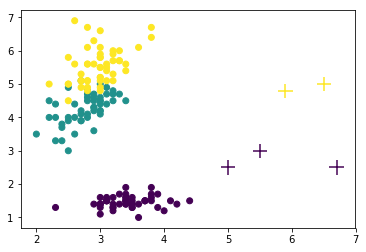

In [81]:
X = np.asarray(iris.data)[:,[1,2]]
y = iris.target
data=[[],[],[]]
for i in range(0, len (X)):
    data[y[i]].append(X[i])
prototypes = []
for i in range(0, len (data)):
    d = np.asarray(data[i])
    prototypes.append(np.average(d, axis=0))
cors = []
for i in range(0, len (data_points)):
    arg = []
    for j in range(0, len (data)):
        d = data_points[i]-np.asarray(prototypes[j])
        d = np.dot(d,d)
        arg.append(d)
    # print (arg)
    arg = np.argmin(np.asarray(arg))
    print (arg)
    cors.append(arg)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(data_points[:,0], data_points[:,1],c= cors, marker = '+', s=200)
plt.show()

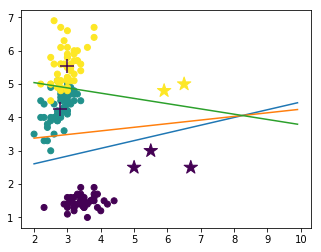

In [86]:
Xs =[]
Ys=[]
for i in range(0, 3):
    for j in range (i+1, 3):     
        a1 = prototypes[i][0]
        a2 = prototypes[i][1]
        b1 = prototypes[j][0]
        b2 = prototypes[j][1]
        x = np.arange(2, 10, 0.1)
        f = np.zeros(len(x))
        tmp = prototypes[i]-prototypes[j]
        tmp = np.dot(tmp, tmp)
        # print (tmp)
        for z in range(0, len (x)):
            f[z] = (1/(b2-a2))*((tmp/2)-(b1-a1)*(x[z]-a1))+a2
        Xs.append(x)
        Ys.append(f)
# 
plt.scatter(X[:, 0], X[:, 1], c=y)
tmp = [0,1,2]
for i in tmp:
    plt.scatter(prototypes[i][0], prototypes[i][1], marker = '+', c=tmp[i], s=200)
for v in tmp:
    plt.plot(Xs[v], Ys[v])
plt.scatter(data_points[:,0], data_points[:,1],c= cors, marker = '*', s=200)
plt.gca().set_aspect('equal')
plt.show()